In [1]:
%matplotlib inline

import os
from os.path import splitext
from pathlib import Path
import json

# from tqdm import tqdm
from ipywidgets import interact

from PIL import Image, ImageDraw
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
IMG_DIR = Path('.') / 'data' / 'images'
EXP_DIR = Path('.') / 'data' / 'expedition'

RECON_CSV = EXP_DIR / '8296_label_babel.reconciled.csv'
UNREC_CSV = EXP_DIR / '8296_label_babel.unreconciled.csv'

BOX_HEADER = 'Rectangle around the primary label.: box'
SEL_HEADER = 'Rectangle around the primary label.: select'

SUB = 'subject_id'
BOX = 'box'
SEL = 'select'
RECON = 'reconciled'

LFT = 'left'
RGT = 'right'
TOP = 'top'
BOT = 'bottom'

# SIZE = 224
SIZE = 299
# SIZE = 512

In [3]:
images = next(os.walk(IMG_DIR))[2]

In [4]:
boxes = pd.read_csv(RECON_CSV)
boxes = boxes.rename(columns={
    BOX_HEADER: BOX,
    SEL_HEADER: SEL})
boxes = boxes.loc[:, [SUB, BOX, SEL]]
boxes = boxes.set_index(SUB)

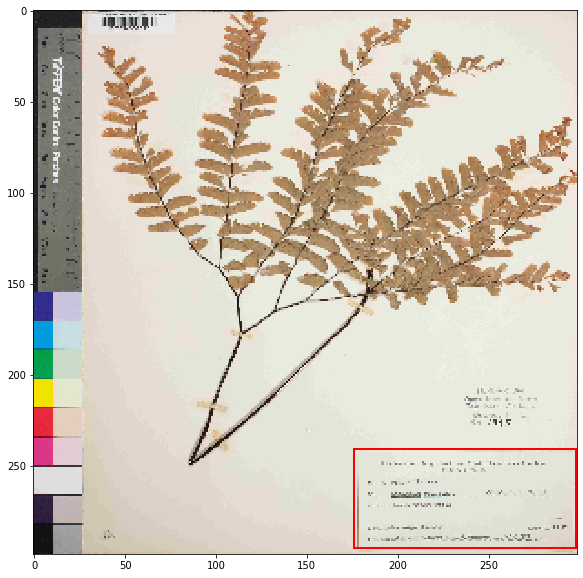

In [5]:
def show_image(idx):
    """Display the image and its mask."""
    subject_id = int(splitext(images[idx])[0])

    path = IMG_DIR / images[idx]
    image = Image.open(path)

    rec = boxes.loc[subject_id, :]
    box = json.loads(rec.at[BOX])

    size = image.size
    image = image.resize((SIZE, SIZE))

    scale_x = SIZE / size[0]
    scale_y = SIZE / size[1]

    x0 = box[LFT] * scale_x
    y0 = box[TOP] * scale_y
    x1 = box[RGT] * scale_x
    y1 = box[BOT] * scale_y

    draw = ImageDraw.Draw(image)
    draw.rectangle([x0, y0, x1, y1], outline='#ff0000')

    plt.figure(figsize=(10, 10))
    plt.imshow(image)


# interact(show_image, idx=(0, len(images) - 1))
show_image(3042)

In [8]:
def create_mask(idx):
    """Display the image and its mask."""
    subject_id = int(splitext(images[idx])[0])

    path = IMG_DIR / images[idx]
    image = Image.open(path)

    rec = boxes.loc[subject_id, :]
    box = json.loads(rec.at[BOX])

    size = image.size
    image = image.resize((SIZE, SIZE))

    scale_x = SIZE / size[0]
    scale_y = SIZE / size[1]

    x0 = box[LFT] * scale_x
    y0 = box[TOP] * scale_y
    x1 = box[RGT] * scale_x
    y1 = box[BOT] * scale_y

    mask = Image.new('RGB', image.size)

    draw = ImageDraw.Draw(mask)
    draw.rectangle([x0, y0, x1, y1], fill='#ffffff')

    plt.figure(figsize=(10, 10))
    plt.imshow(mask)


# interact(create_mask, idx=(0, len(images) - 1))
# create_mask(3042)

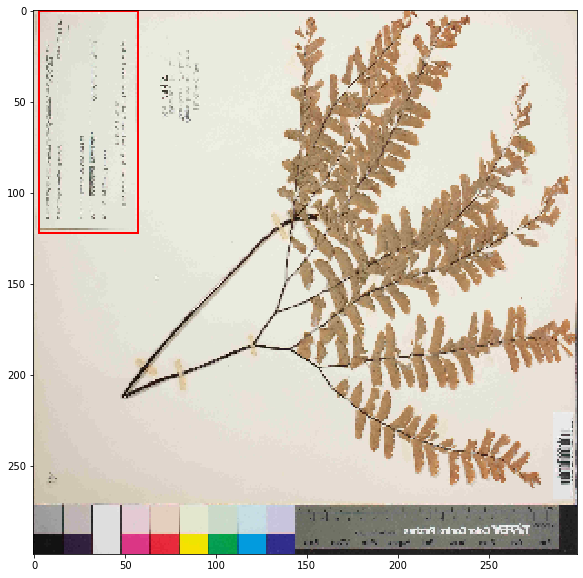

In [7]:
def transform_image(idx):
    """Display the image and its mask."""
    subject_id = int(splitext(images[idx])[0])

    path = IMG_DIR / images[idx]
    image = Image.open(path)

    rec = boxes.loc[subject_id, :]
    box = json.loads(rec.at[BOX])

    size = image.size
    image = image.resize((SIZE, SIZE))

    scale_x = SIZE / size[0]
    scale_y = SIZE / size[1]
    
    x0 = box[LFT] * scale_x
    y0 = box[TOP] * scale_y
    x1 = box[RGT] * scale_x
    y1 = box[BOT] * scale_y
    
    image = image.transpose(Image.FLIP_TOP_BOTTOM)
    image = image.transpose(Image.ROTATE_90)

    # x0, y0, x1, y1 =  SIZE - x1, y0, SIZE - x0, y1  # FLIP_LEFT_RIGHT
    x0, y0, x1, y1 =  x0, SIZE - y1, x1, SIZE - y0  # FLIP_TOP_BOTTOM
    x0, y0, x1, y1 = y0, SIZE - x0, y1, SIZE - x1  # ROTATE_90
    # x0, y0, x1, y1 =  SIZE - x0, SIZE - y0, SIZE - x1, SIZE - y1  # ROTATE_180
    # x0, y0, x1, y1 =  SIZE - y0, x0, SIZE - y1, x1  # ROTATE_270
    
    draw = ImageDraw.Draw(image)
    draw.rectangle([x0, y0, x1, y1], outline='#ff0000')

    plt.figure(figsize=(10, 10))
    plt.imshow(image)


# interact(transform_image, idx=(0, len(images) - 1))
transform_image(3042)